# Deep Computer Vision Using Convolutional Neural Network

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

2024-01-19 22:09:10.941054: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-19 22:09:11.071122: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-19 22:09:11.072214: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-19 22:09:12.290426: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
def plot_image(image):
    plt.imshow(image, cmap="gray", interpolation="nearest")
    plt.axis("off")
    
def plot_color_image(image):
    plt.imshow(image, interpolation="nearest")
    plt.axis("off")

## The Architecture of the Visual Cortex

## Convolutional Layers

### Filters

### Stacking Multiple Feature Maps

### TensorFlow Implementation

In TensorFlow, each input image is represented as a 3D Tensor of shape [*height, width, channels*]. A mini-batch is represented as a 4D Tensor of shape [*mini-batch size, height, width, channels*]. The weights of the convolutional layer are represented as a 4D tensor of shape [*$f_h,f_w, f_{n'}, f_n$*]. 

The bias term of a convolutional layer are simply represented as a 1D tensor of shape [*$f_n$*].

The following code load two color images, then create two filters and applies them to both images, and finally displays one of the resulting feature maps.

In [4]:
from sklearn.datasets import load_sample_image

# Load sample images
china = load_sample_image("china.jpg") / 255
flower = load_sample_image("flower.jpg") / 255
images = np.array([china, flower])
batch_size, height, width, channels = images.shape

In [17]:
china

array([[[0.68235294, 0.78823529, 0.90588235],
        [0.68235294, 0.78823529, 0.90588235],
        [0.68235294, 0.78823529, 0.90588235],
        ...,
        [0.98039216, 0.98431373, 1.        ],
        [0.98039216, 0.98431373, 1.        ],
        [0.98039216, 0.98431373, 1.        ]],

       [[0.6745098 , 0.78039216, 0.89803922],
        [0.67843137, 0.78431373, 0.90196078],
        [0.67843137, 0.78431373, 0.90196078],
        ...,
        [0.98431373, 0.98823529, 1.        ],
        [0.98431373, 0.98823529, 1.        ],
        [0.98431373, 0.98823529, 1.        ]],

       [[0.68235294, 0.78823529, 0.90588235],
        [0.68235294, 0.78823529, 0.90588235],
        [0.68235294, 0.78823529, 0.90588235],
        ...,
        [0.98823529, 0.99215686, 1.        ],
        [0.98823529, 0.99215686, 1.        ],
        [0.98823529, 0.99215686, 1.        ]],

       ...,

       [[0.34509804, 0.31372549, 0.02745098],
        [0.57647059, 0.54117647, 0.27058824],
        [0.47843137, 0

In [18]:
china.shape

(427, 640, 3)

Image has 427 slices. With each slice having 640 rows and 3 columns.

In [12]:
# create 2 filters
filters = np.zeros(shape=(7,7, channels, 2), dtype=np.float32)

In [21]:
filters

array([[[[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[1., 0.],
         [1., 0.],
         [1., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]]],


       [[[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[1., 0.],
         [1., 0.],
         [1., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]]],


       [[[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 

In [22]:
filters.shape

(7, 7, 3, 2)

[Quite Simple and intutive explanation on how 4D array works](https://stackoverflow.com/a/47143492/16273741)

So basically [7, 7, 3, 2] is a 7x7 matrix which contains matrices of each matrix having shape 3x2.

In [28]:
filters[:, 3, :, 0] = 1 # vertical line
filters[3, :, :, 1] = 1 # horizontal line

Cross verifying that 0th index of all the matrices of 3rd column of 7x7 matrix has been changed to 1.

In [29]:
filters[:, 3]

array([[[1., 0.],
        [1., 0.],
        [1., 0.]],

       [[1., 0.],
        [1., 0.],
        [1., 0.]],

       [[1., 0.],
        [1., 0.],
        [1., 0.]],

       [[1., 1.],
        [1., 1.],
        [1., 1.]],

       [[1., 0.],
        [1., 0.],
        [1., 0.]],

       [[1., 0.],
        [1., 0.],
        [1., 0.]],

       [[1., 0.],
        [1., 0.],
        [1., 0.]]], dtype=float32)

Cross verifying that 1st index of all the matrices of 3rd row of 7x7 matrix has been changed to 1.

In [31]:
filters[3, :]

array([[[0., 1.],
        [0., 1.],
        [0., 1.]],

       [[0., 1.],
        [0., 1.],
        [0., 1.]],

       [[0., 1.],
        [0., 1.],
        [0., 1.]],

       [[1., 1.],
        [1., 1.],
        [1., 1.]],

       [[0., 1.],
        [0., 1.],
        [0., 1.]],

       [[0., 1.],
        [0., 1.],
        [0., 1.]],

       [[0., 1.],
        [0., 1.],
        [0., 1.]]], dtype=float32)

In [32]:
outputs = tf.nn.conv2d(images, filters, strides=1, padding="SAME")

In `tf.nn.conv2d`:

- `images` is the input mini-batch (a 4D Tensor)
- `filters` is set of filters to apply (also a 4D Tensor)
- `strides` is equal to 1, but it could also be a 1D array with four elements, where two central elements are the vertical ahd horizontal strides ($s_h$ and $s_w$). The first and last elements must be equal to 1. They may one day be used to specify a batch stride (to skip some instances) and a channel stride (to skip some of the previous layer's feature maps or channels).
- `padding` must be either `"same"` or `"valid"`:
    - If set to `"same"`, the convolutional layer uses zero padding if necessary. When `strides=1`, the layer's outputs will have the same spatial dimenstions (width and height) as its inputs, hence the name `same`.
    - If set to `"valid"`, the convolutional layer does not use zero padding and may ignore some rows and columns at bottom and right of the input image, depending on the stride. 
    
    
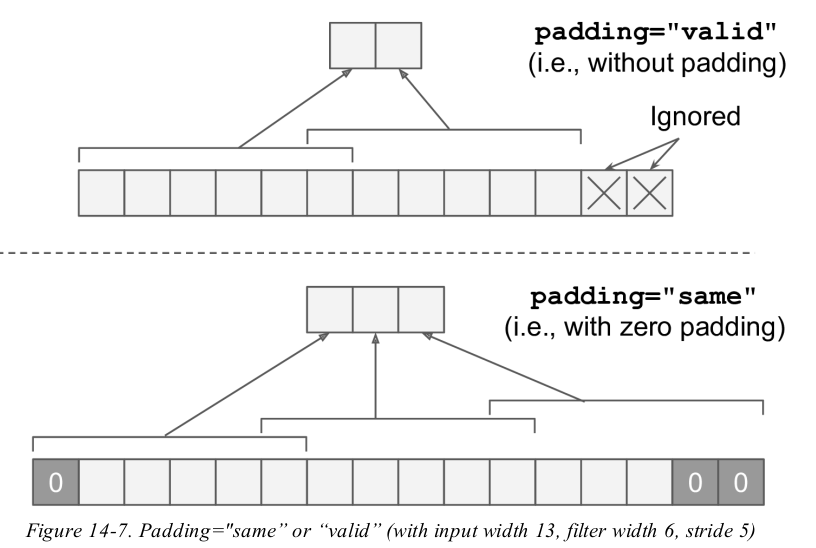

In [33]:
outputs.shape

TensorShape([2, 427, 640, 2])

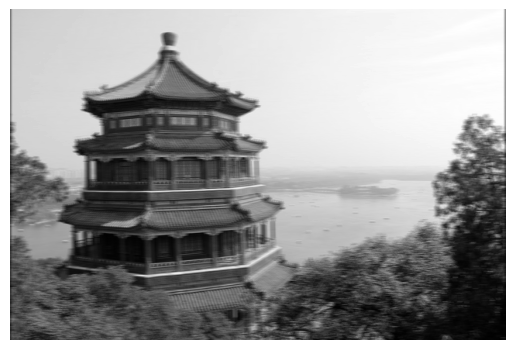

In [35]:
plt.imshow(outputs[0, :, :, 1], cmap="gray") # plot 1st images 2nd feature map.
plt.axis("off")
plt.show()

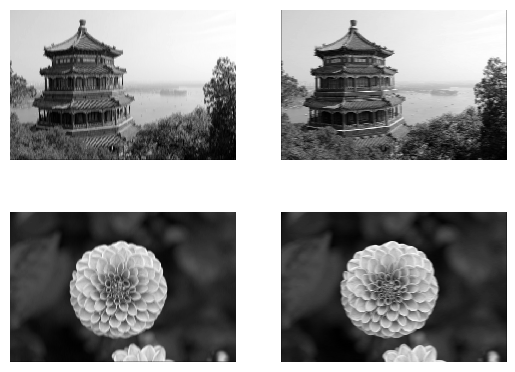

In [42]:
for image_index in (0, 1):
    for feature_map_index in (0, 1):
        plt.subplot(2, 2, image_index * 2 + feature_map_index + 1)
        plot_image(outputs[image_index, :, :, feature_map_index])
        
plt.show()

In [5]:
def crop(images):
    return images[150:200, 130:250]

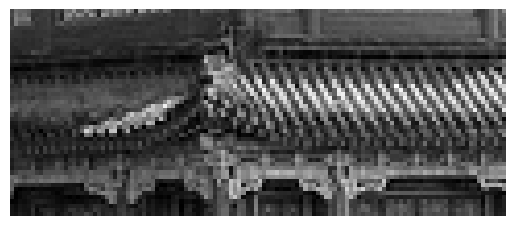

In [45]:
plot_image(crop(images[0, :, :, 0]))
plt.show()

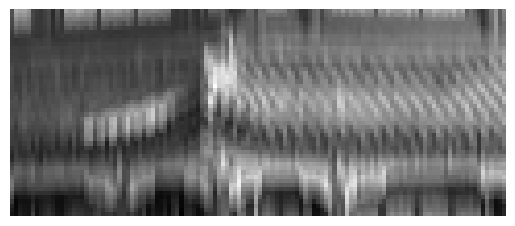

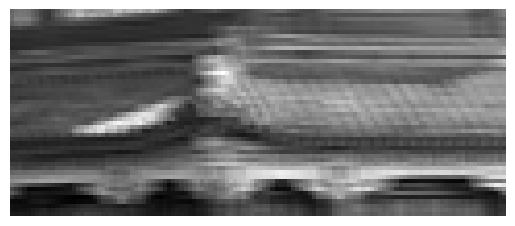

In [48]:
for feature_map_index, name in enumerate(["china_vertical", "china_horizontal"]):
    plot_image(crop(outputs[0, :, :, feature_map_index]))
    plt.show()

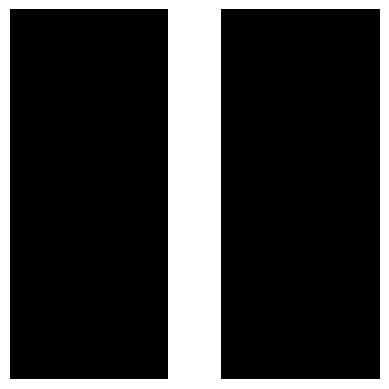

In [49]:
plot_image(filters[:, :, 0, 0])

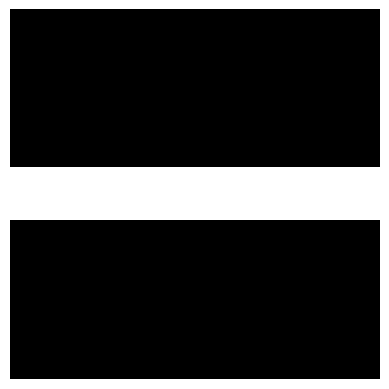

In [50]:
plot_image(filters[:, :, 0, 1])

In this example we manually defined the filters, but in real CNN we would normally define filters as trainable so the neural net can learn which filter works best. Instead of manually creating the variables, use the `keras.layers.Conv2D` layer:

In [51]:
conv = keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, padding="same", activation="relu")

This code creates a Conv2D layer with 32 filters, each 3x3, using a stride of 1 (both horizontally and vertically) and "same" padding, and applying the ReLU activation function to its outputs. 

Convolutional layers has quite a few hyperparameters: we must choose the number of filters, their height and width, the strides and the padding type. 

### Memory Requirements

**TIP:**

If training crashes because of an out-of-memory error, we can try reducing the mini-batch size. Alternatively, we can try reducing dimensionality using a stride, or removing few layers. Or we can try using 16-bit floats instead of 32-bit floats. Or we could distribute the CNN across multiple devices.

## Pooling Layer

### Tensorflow Implementation

The following code creates a max pooling layer using a 2x2 kernel. The stride default to kernel size, so this layer will use a stride of 2 (both horizontally and vertically). By default it uses `"valid"` padding (i.e., no padding at all):

In [2]:
max_pool = keras.layers.MaxPool2D(pool_size=2)

To create an *average pooling layer*, we just use `AvgPool2D` instead of `MaxPool2D`. 

In [6]:
cropped_images = np.array([crop(image) for image in images], dtype=np.float32)
output = max_pool(cropped_images)

In [7]:
output.shape

TensorShape([2, 25, 60, 3])

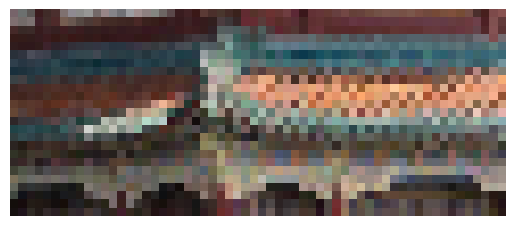

In [8]:
plot_image(output[0])

### Depth-wise Pooling

Keras does not include depth wise max-pooling layer, but TensorFlow's low-level Deep Learning API does: just use the `tf.nn.max_pool()` layer, and specify the kernel size and strides as a 4-tuples(i.e, tuples of size 4). The first three values of each should be 1: this indicates that the kernel size and stride along the batch, height, and width dimenstions should be 1. The last value should be whatever kernel size and stride we want along the depth dimension - for eg, 3 (this must be divisor of the input depth; it will not work if the previous layer outputs 20 feature maps, since 20 is not a multiple of 3):

In [14]:
output = tf.nn.max_pool(images, ksize=(1, 1, 1, 3), strides=(1,1,1,3), padding="VALID")

In [15]:
output.shape

TensorShape([2, 427, 640, 1])

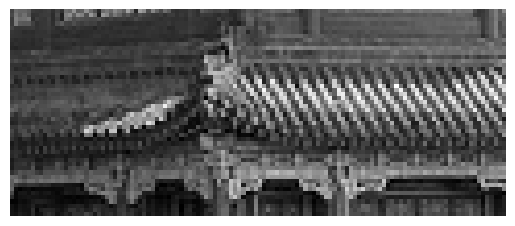

In [16]:
plot_image(crop(output[0]))

If we want to include this layer in your Keras models, wrap it in a `Lambda` layer (or create a custom Keras layer):

In [17]:
depth_pool = keras.layers.Lambda(lambda X: tf.nn.max_pool(X, ksize=(1,1,1,3), strides=(1,1,1,3),
                                                          padding="VALID"))

To create such a layer, simply use the `keras.layers.GlobalAvgPool2D` class:

In [19]:
global_avg_pool = keras.layers.GlobalAvgPool2D()

In [20]:
global_avg_pool(cropped_images)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[0.28310943, 0.2441023 , 0.22670619],
       [0.48978567, 0.4544353 , 0.34281188]], dtype=float32)>

## CNN Architectures

Here's how we can implement a simple CNN to tackle a Fashion MNIST dataset:

In [23]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

In [24]:
X_train.shape, X_valid.shape

((55000, 28, 28), (5000, 28, 28))

In [29]:
X_mean = X_train.mean(axis=0, keepdims=True)
X_std = X_train.std(axis=0, keepdims=True) + 1e-7
X_train = (X_train - X_mean) / X_std
X_valid = (X_valid - X_mean) / X_std
X_test = (X_test - X_mean) / X_std

X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [37]:
from functools import partial

DefaultConv2D = partial(keras.layers.Conv2D, kernel_size=3, activation="relu", padding="SAME")

model = keras.models.Sequential([
    DefaultConv2D(filters=64, kernel_size=7, input_shape=[28, 28, 1]),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=256),
    DefaultConv2D(filters=256),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=64, activation="relu"),
    keras.layers.Dense(0.5),
    keras.layers.Dense(units=10, activation="softmax"),
])

- The first layer uses 64 fairly large filters (7x7) but no stride because the input images are not very large. It also sets `input_shape=[28,28,1]` because the images are 28x28 with single color channel (i.e., grayscale)
- Next we have a max pooling layer which uses a pool size of 2, so it divides each spatial dimension by a factor of 2.
- Then we repeat the same structure twice: two convolutional layers followed by a max pooling layer. For larger images, we could repeat this structure several more times (the number of repetitions is a hyperparameter that we can tune)
- Note that the number of filters grows up as we climb up to the CNN towards the output layer (it is initially 64, then 128, then 256): it makes sense to grow since the number of low-level features is often fairly low (e.g., small circles, horizontal lines). It is common practice to double the number of filters after each pooling layer: since each pooling layer divides each spatial dimension by a factor of 2.
- Next is fully connected layer , composed of two hidden dense layers and a dense output layer. Note that we must flatten its inputs, since the network expects a 1D array of features for each instance. We also added two dropout layers, with a drop rate of 50% each to reduce the overfitting.

In [38]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
h = model.fit(X_train, y_train, epochs=5, validation_data=(X_valid, y_valid))
score = model.evaluate(X_test, y_test)
X_new = X_test[:10]
y_pred = model.predict(X_new)

Epoch 1/5


2024-01-18 15:30:53.353938: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 172480000 exceeds 10% of free system memory.


1719/1719 [==============================] - 395s 229ms/step - loss: 2.3025 - accuracy: 0.0996 - val_loss: 2.3026 - val_accuracy: 0.1042
Epoch 2/5
1719/1719 [==============================] - 387s 225ms/step - loss: 2.3025 - accuracy: 0.0996 - val_loss: 2.3026 - val_accuracy: 0.1042
Epoch 3/5
1719/1719 [==============================] - 387s 225ms/step - loss: 2.3025 - accuracy: 0.0996 - val_loss: 2.3026 - val_accuracy: 0.1042
Epoch 4/5
1719/1719 [==============================] - 392s 228ms/step - loss: 2.3025 - accuracy: 0.0996 - val_loss: 2.3026 - val_accuracy: 0.1042
Epoch 5/5
1/1 [==============================] - 0s 263ms/step


### LeNet-5

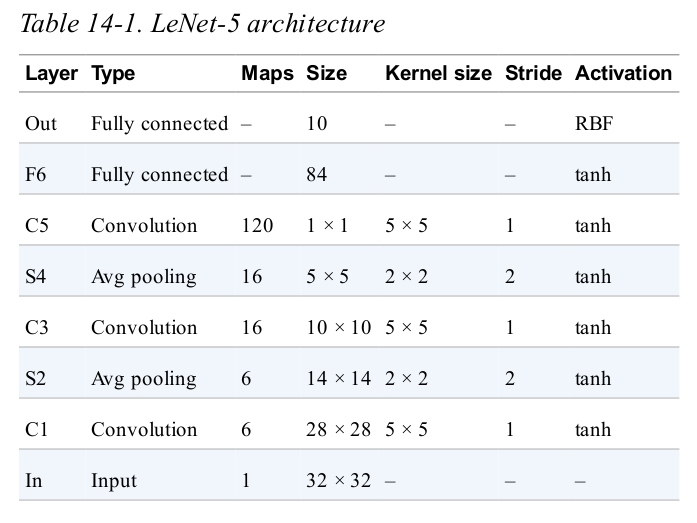

### AlexNet

Developed by Alex Krizhevsky(hence the name), Ilya Sutskever, and Geoffrey Hinton [All legends].

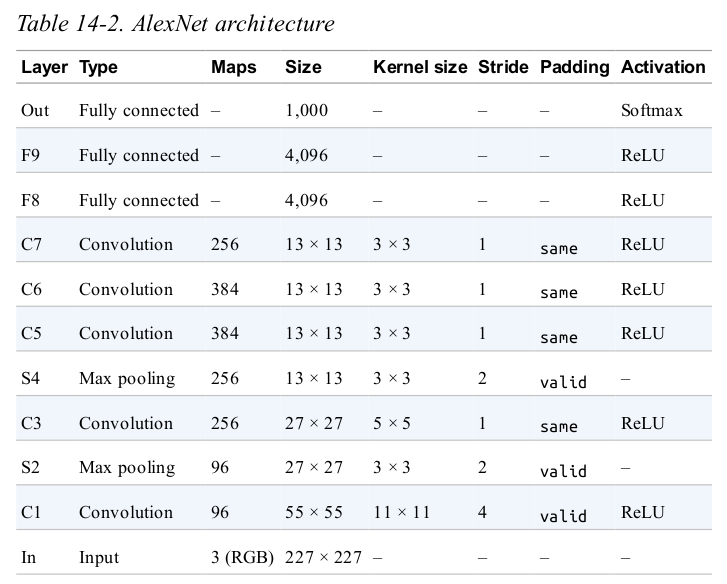

In AlexNet, the hyperparameters are set as follows: $r = 2, \alpha = 0.00002, \beta = 0.75, k = 1$. 

Local Response Normalization can be implemented using `tf.nn.local_response_normalization()` function (which we can wrap in a `Lambda` layer if we want to use it in a Keras model).

A variant of AlexNet called ZFNet developed by Matthew Zeiler
and Rob Fergus and won the 2013 ILSVRC challenge. It is essentially AlexNet with few tweaked hyperparameters.

### GoogLeNet

Developed by Christian Szegedy and won 2014 ILSVRC challenge. 

**Architecture:**

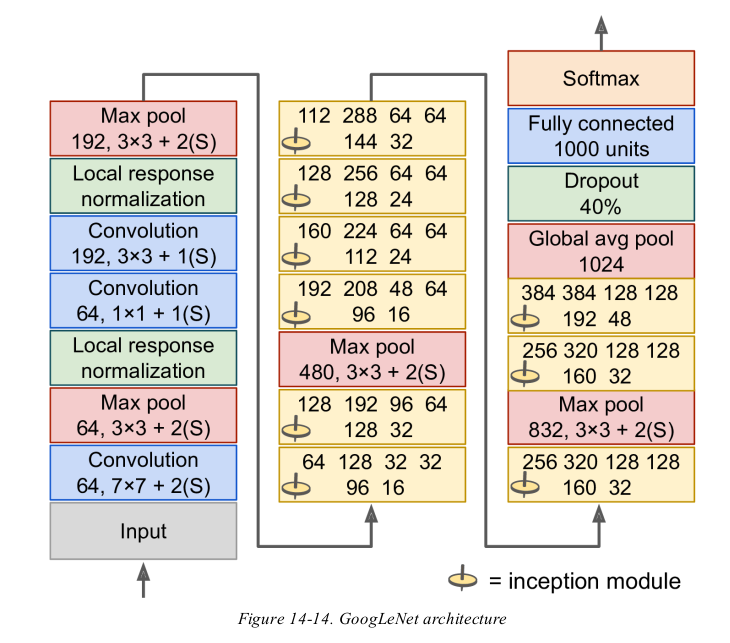

Let's go through the network:

- The first two layers divide the image's height and width by 4 (so its area is divided by 16), to reduce the computational load. The first layer uses the large kernel size so that much of the information is preserved.
- Then Local repose normalization layer ensures that the pervious layer learn a wide variety of features. 
- Two convolutional layers follow, where the first acts like a bottleneck layer.
- Again, a local response normalization layer ensures that the previous layers capture a wide variety of patterns.
- Next, a max pooling layer reduces the image height and width by 2, again to speed up computations.
- Then comes a tall stack of nine inception modules, interleaved with a couple of max pooling layers to reduce dimensionality and speed up the net. 
- Next, the global average pooling layer outputs the mean of each feature map.

This diagram is slightly simplified.

Several variants of GoogLeNet architecture was later proposed by Google researchers, including Inception-v3 and Inception-v4, using slightly different inception modules and reaching even better performance.

### VGGNet